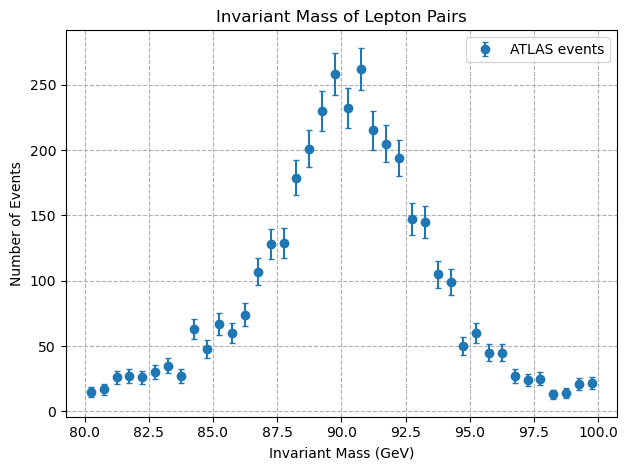

In [5]:
#Part One:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('atlas_z_to_ll.csv', header = 0)

pt1 = data['pt1']
pt2 = data['pt2']

eta1 = data['eta1']
eta2 = data['eta2']

phi1 = data['phi1']
phi2 = data['phi2']

E1 = data['E1']
E2 = data['E2']

px1 = pt1 * np.cos(phi1)
py1 = pt1 * np.sin(phi1)
pz1 = pt1 * np.sinh(eta1)

px2 = pt2 * np.cos(phi2)
py2 = pt2 * np.sin(phi2)
pz2 = pt2 * np.sinh(eta2)

E_tot = E1 + E2
px_tot = px1 + px2
py_tot = py1 + py2
pz_tot = pz1 + pz2

M = np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

bins = np.linspace(80,100,41)
counts, bin_edge = np.histogram(M, bins = bins)
bin_centers = 0.5 * (bin_edge[1:] + bin_edge[:-1])
yerr = np.sqrt(counts)

fig, ax = plt.subplots()
ax.errorbar(bin_centers, counts, yerr=yerr, fmt = 'o', label = 'ATLAS events', capsize = 2)
ax.set_xlabel('Invariant Mass (GeV)')
ax.set_ylabel('Number of Events')
ax.set_title('Invariant Mass of Lepton Pairs')
ax.grid(True, linestyle = '--')
ax.legend()
plt.tight_layout()

<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chris\AppData\Local\Temp\ipykernel_55792\427272150.py:51: SyntaxWarning: invalid escape sequence '\c'
  annotation = (f'Best Fit $m_0$: {m0_fit:.1f} ± {m0_err:.1f} GeV\nWidth Γ: {gam_fit:.1f} GeV\n$\chi^2$/DOF: {red_chisq:.1f}\np-value: {pval:.1f}')


Chi-squared:9.985097164346044
Degrees of freedom: 10


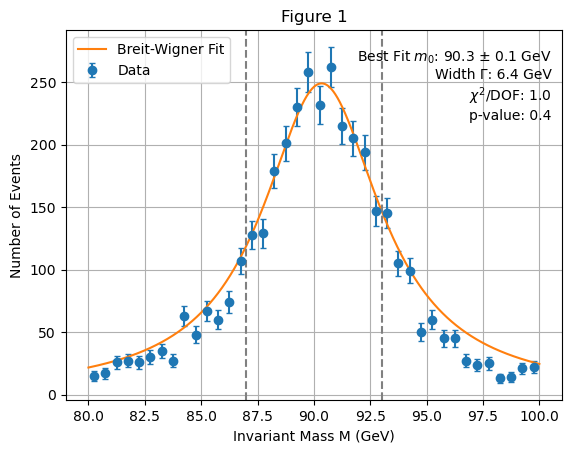

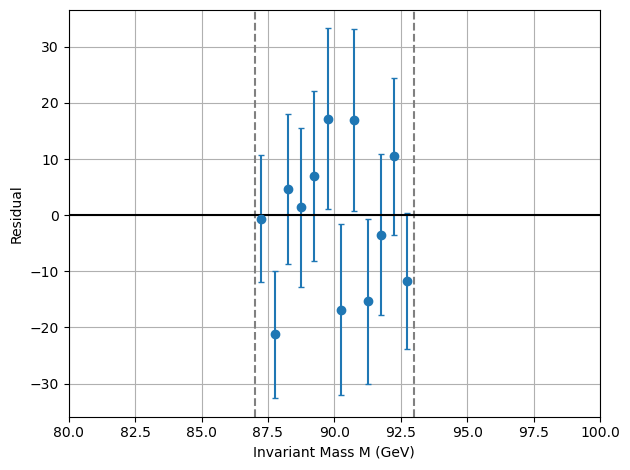

In [64]:
# Part Two
from scipy.optimize import curve_fit
from scipy.stats import chi2

def BW(m, m0, gam):
    return (gam / 2) / (np.pi * ((m - m0)**2 + (gam / 2)**2))

mask = (bin_centers > 87) & (bin_centers < 93)
x_fit = bin_centers[mask]
y_fit = counts[mask]
yerr_fit = yerr[mask]
norm = len(M) / 2

def fit(m, m0, gam):
    return norm * BW(m, m0, gam)

p0 = [91, 2.5]
popt, pcov = curve_fit(fit, x_fit, y_fit, p0=p0, sigma=yerr_fit, absolute_sigma = True)
m0_fit, gam_fit = popt
m0_err, gam_err = np.sqrt(np.diag(pcov))

fig, ax2 = plt.subplots()
ax2.errorbar(bin_centers, counts, yerr=yerr, fmt='o', label = 'Data', capsize = 2)
ax2_plot = np.linspace(80,100,1000)
ax2.plot(ax2_plot, fit(ax2_plot, *popt), label = 'Breit-Wigner Fit')
ax2.axvline(87, linestyle = '--', color = 'gray')
ax2.axvline(93, linestyle = '--', color = 'gray')
ax2.set_title('Figure 1')
ax2.legend(loc='upper left')
ax2.set_xlabel('Invariant Mass M (GeV)')
ax2.set_ylabel('Number of Events')
ax2.grid(True)

fig, ax3 = plt.subplots()
resid = y_fit - fit(x_fit, *popt)
ax3.errorbar(x_fit, resid, yerr=yerr_fit, fmt = 'o', capsize = 2)
ax3.axvline(87, linestyle = '--', color = 'gray')
ax3.axvline(93, linestyle = '--', color = 'gray')
ax3.axhline(0, color = 'black')
ax3.set_xlim(80,100)
ax3.set_xlabel('Invariant Mass M (GeV)')
ax3.set_ylabel('Residual')
ax3.grid(True)

expected = fit(x_fit, *popt)
chisq = np.sum(((y_fit - expected)**2) / yerr_fit**2)
dof = len(y_fit) - len(popt)
red_chisq = chisq / dof
pval = chi2.sf(chisq, dof)

annotation = (f'Best Fit $m_0$: {m0_fit:.1f} ± {m0_err:.1f} GeV\nWidth Γ: {gam_fit:.1f} GeV\n$\chi^2$/DOF: {red_chisq:.1f}\np-value: {pval:.1f}')

ax2.annotate(annotation, xy=(0.98, 0.95), xycoords='axes fraction', ha='right', va='top')
plt.tight_layout()

print(f'Chi-squared:{chisq}')
print(f'Degrees of freedom: {dof}')

<>:42: SyntaxWarning: invalid escape sequence '\c'
<>:42: SyntaxWarning: invalid escape sequence '\c'
C:\Users\chris\AppData\Local\Temp\ipykernel_55792\1301028953.py:42: SyntaxWarning: invalid escape sequence '\c'
  f'$\chi^2$/NDOF = {chisq_red:.1f}\n'


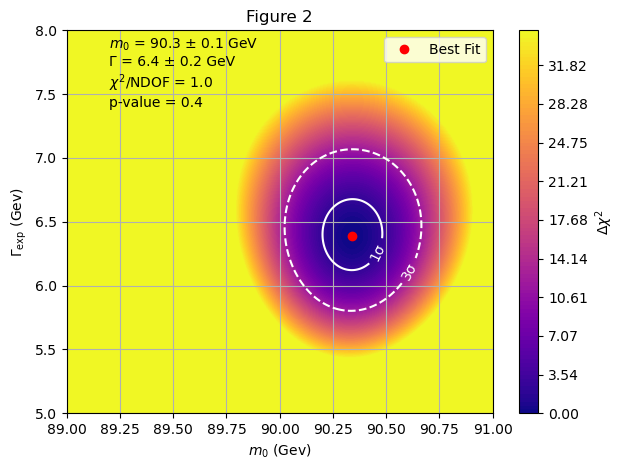

In [55]:
# Part Three:

m0_best, gam_best = popt

def chi_squared(m0, gam):
    model = 2500* BW(x_fit, m0, gam)
    residual = (y_fit - model) / yerr_fit
    return np.sum(residual**2)

m0_vals = np.linspace(89,91,300)
gam_vals = np.linspace(5,8,300)
m0_grid, gam_grid = np.meshgrid(m0_vals, gam_vals)

chisq_grid = np.zeros_like(m0_grid)
for i in range(gam_grid.shape[0]):
    for j in range(m0_grid.shape[1]):
        m0 = m0_grid[i,j]
        gam = gam_grid[i,j]
        chisq_grid[i,j] = chi_squared(m0, gam)

chisq_min = np.min(chisq_grid)
dchisq = chisq_grid - chisq_min
fig, ax4 = plt.subplots()
contour = ax4.contourf(m0_grid, gam_grid, np.clip(dchisq, 0, 35), levels = np.linspace(0,35,100), cmap = 'plasma')
cbar = fig.colorbar(contour, ax = ax4)
cbar.set_label(r'$\Delta \chi^2$')

levels = [2.3, 11.83]
contour_conf = ax4.contour(m0_grid, gam_grid, dchisq, levels = levels, linestyles = ['-', '--'], colors = 'white')
ax4.clabel(contour_conf, fmt={2.3: '1σ', 11.83: '3σ'})
ax4.plot(m0_best, gam_best, 'ro', label = 'Best Fit')

perr = np.sqrt(np.diag(pcov))
m0_uncert, gam_uncert = perr

ndof = len(x_fit) - 2
chisq_fit = chi_squared(m0_best, gam_best)
chisq_red = chisq_fit / ndof

ax4.annotate(f'$m_0$ = {m0_best:.1f} ± {m0_uncert:.1f} GeV\n'
    f'Γ = {gam_best:.1f} ± {gam_uncert:.1f} GeV\n'
    f'$\chi^2$/NDOF = {chisq_red:.1f}\n'
    f'p-value = {pval:.1f}',
    xy=(0.1, 0.8), xycoords='axes fraction', ha='left')

ax4.set_xlabel(r'$m_0$ (Gev)')
ax4.set_ylabel(r'$\Gamma_{\mathrm{exp}}$ (Gev)')
ax4.set_title('Figure 2')
ax4.legend()
ax4.grid(True)

plt.tight_layout()